In [139]:
import numpy as np
from  matplotlib import pyplot as plt

## load data

In [192]:
feature_path = '/data2/mytu/feature_generation/features/features_2000_3.npy'
feature = np.load(feature_path)

In [205]:
drugs_path = '/data2/mytu/feature_generation/features/drugs_features_2000_3.npy'
old_path = '/data2/mytu/feature_generation/features/old_features_2000_3.npy'
drugs_features = np.load(drugs_path)
old_features = np.load(old_path)

## min-max normalization between all fishes

### min-max

In [80]:
max_all = np.max(feature, axis=0)
min_all = np.min(feature, axis=0)

In [81]:
normed1 = (feature - min_all) / (max_all - min_all)

In [84]:
np.save('/data2/mytu/feature_generation/features/features_norm1_2000_3.npy', normed1)

In [227]:
# features = np.array_split(feature, 10, axis=1)
features = np.array_split(feature, 10, axis=1)

In [228]:
normed1 = np.zeros_like(features)
for i in range(10):
    max_fish = np.max(features[i], axis=1)
    min_fish = np.min(features[i], axis=1)
    normed1[i] = ((features[i].swapaxes(0,1) - min_fish) / (max_fish - min_fish)).swapaxes(0,1)

/home/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [229]:
norm1_features = np.zeros_like(feature)
for i, norm in enumerate(normed1):
    norm1_features[:,i*200:(1+i)*200] = norm

In [230]:
norm1_features.shape

(962, 2000, 3)

In [90]:
normed2 = np.zeros_like(features)
for i in range(10):
    max_c = np.max(features[0][:,:,0])
    max_t = np.max(features[0][:,:,1])
    max_s = np.max(features[0][:,:,2])
    min_c = np.min(features[0][:,:,0])
    min_t = np.min(features[0][:,:,1])
    min_s = np.min(features[0][:,:,2])
    normed2[i] = np.dstack(((features[i][:,:,0] - min_c) / (max_c - min_c), (features[i][:,:,1] - min_t) / (max_t - min_t), (features[i][:,:,2] - min_s) / (max_s - min_s)))

In [91]:
norm_features = np.zeros_like(feature)
for i, norm in enumerate(normed2):
    norm_features[:,i*200:(1+i)*200] = norm

In [111]:
norm_features.shape

(962, 2000, 3)

In [93]:
np.save('/data2/mytu/feature_generation/features/features_norm_2000_3.npy', norm_features)

### z-score

In [103]:
normed3 = np.zeros_like(features)
for i in range(10):
    mu_c = np.mean(features[0][:,:,0])
    mu_t = np.mean(features[0][:,:,1])
    mu_s = np.mean(features[0][:,:,2])
    std_c = np.std(features[0][:,:,0])
    std_t = np.std(features[0][:,:,1])
    std_s = np.std(features[0][:,:,2])
    normed3[i] = np.dstack(((features[i][:,:,0] - mu_c) / std_c, (features[i][:,:,1] - mu_t) / std_t, (features[i][:,:,2] - mu_s) / std_s))

In [105]:
norm3_features = np.zeros_like(feature)
for i, norm in enumerate(normed3):
    norm3_features[:,i*200:(1+i)*200] = norm

In [112]:
norm3_features.shape

(962, 2000, 3)

## multiply

In [118]:
feature_multi_ct.shape

(962, 2000)

In [99]:
feature_multi_ct = feature[:,:,0] * feature[:,:,1]
feature_multi_cc = feature[:,:,0] * feature[:,:,0]
feature_multi_tt = feature[:,:,1] * feature[:,:,1]
feature_multi_tt_cc = feature[:,:,1] * feature[:,:,1] - feature[:,:,0] * feature[:,:,0]

## merge data

In [233]:
features_pot = np.dstack((feature, norm1_features, norm_features, norm3_features, feature_multi_ct, feature_multi_cc, feature_multi_tt, feature_multi_tt_cc))

In [122]:
np.save('/data2/mytu/feature_generation/features/features_pot.npy', features_pot)

## move outliers

In [219]:
need_move_drugs = list(set(np.where(np.isnan(norm1_features))[0]))

In [225]:
need_move_old = list(set(np.where(np.isnan(norm1_features))[0]))

In [231]:
need_move = list(set(np.where(np.isnan(norm1_features))[0]))
# need_move = need_move_drugs.extend(need_move_old)

In [232]:
len(need_move)

13

In [234]:
features_pot = np.delete(features_pot, need_move, axis=0)

In [235]:
label = np.hstack(([1] * (drugs_features.shape[0] - len(need_move_drugs)), [0] * (old_features.shape[0] - len(need_move_old))))

In [236]:
np.save('/data2/mytu/feature_generation/features/features_pot.npy', features_pot)

In [237]:
np.save('/data2/mytu/feature_generation/features/label_pot.npy', label)

## validate

In [197]:
feature_path = '/data2/mytu/feature_generation/features/features_norm_all.npy'
label_path = '/data2/mytu/feature_generation/features/label_norm.npy'
features = np.load(feature_path)
label = np.load(label_path)

(array([565.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 384.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

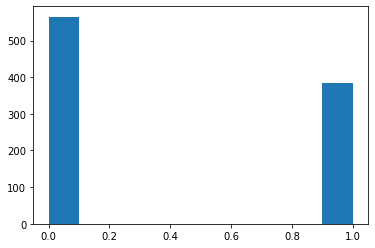

In [238]:
plt.hist(label)

In [241]:
import pickle

In [242]:
old_path = '/data2/mytu/feature_generation/features/old_features.pkl'
f = open(old_path, 'rb')
old_features = pickle.load(f)
f.close()

In [243]:
import os

In [245]:
path = '/data2/zhshen/data/zebra_fish/block1'
for root, dirs, files in os.walk(path):
    if len(files)>800:
        for file in files:
            print(root)

/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/719

/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/719

/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/719

/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/719

/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/cont56/Pos0
/data2/zhshen/data/zebra_fish/block1/719

/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719/fish56/test56/Pos0
/data2/zhshen/data/zebra_fish/block1/719

/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/cont12/Pos0
/data2/zhshen/data/zebra_fish/block1/720

/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish12/test12/Pos0
/data2/zhshen/data/zebra_fish/block1/720

/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/720

/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720/fish34/test34/Pos0
/data2/zhshen/data/zebra_fish/block1/720

/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/cont56/Pos1
/data2/zhshen/data/zebra_fish/block1/720

/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720/fish56/test56/Pos1
/data2/zhshen/data/zebra_fish/block1/720

/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/cont12/Pos1
/data2/zhshen/data/zebra_fish/block1/721

/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721/fish12/test12/Pos1
/data2/zhshen/data/zebra_fish/block1/721

/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721/fish34/cont34/Pos0
/data2/zhshen/data/zebra_fish/block1/721

KeyboardInterrupt: 